<a href="https://colab.research.google.com/github/faishalAhmed03/plant-disease-detection-and-care/blob/main/potato_plant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import libraries
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np
import pathlib
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # to disable all debugging logs

In [ ]:
# importing dataset
dir = os.listdir('/content/drive/MyDrive/DATASET/PlantVillage')
for filenames in dir:
    print(filenames)

Tomato_Spider_mites_Two_spotted_spider_mite
Tomato_Leaf_Mold
Tomato__Tomato_mosaic_virus
Tomato__Tomato_YellowLeaf__Curl_Virus
Tomato_Bacterial_spot
Tomato_Late_blight
Tomato_Septoria_leaf_spot
Tomato_Early_blight
Tomato__Target_Spot
Tomato_healthy
Potato___Early_blight
Pepper__bell___Bacterial_spot
Potato___Late_blight
Potato___healthy
Pepper__bell___healthy


In [ ]:
!cp -rf /content/drive/MyDrive/DATASET/PlantVillage/Potato___Early_blight ./Potato___Early_blight

In [ ]:
!cp -rf /content/drive/MyDrive/DATASET/PlantVillage/Potato___Late_blight ./Potato___Late_blight

In [ ]:
!cp -rf /content/drive/MyDrive/DATASET/PlantVillage/Potato___healthy ./Potato___healthy

In [20]:
current_Dir = "/content/potato"  # Replace with the desired directory path
dataset_dir = pathlib.Path(current_Dir)
print(dataset_dir)

/content/potato


In [21]:
#Global initialization of some imp variables
Image_Size = 256
Batch_Size = 32
Channels = 3
Epochs = 40

In [22]:
#yields batches of images from the subdirectories class_a , class_b and class_c
#together with labels 0 , 1 and 2 (0, 1, 2 corresponding to classes class_a , class_b and class_c respectively )
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_dir, batch_size = Batch_Size, image_size = (Image_Size, Image_Size), shuffle = True)


Found 2151 files belonging to 3 classes.


In [23]:
#Folders(classes) in 'Dataset' directory
class_name = dataset.class_names
class_name

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [24]:
len(dataset) # Number of Batches = (total number of files belonging to all classes / Batch_Size)

68

In [26]:
print(dataset) #prints Elements in dataset: here 1st element is image and 2nd index of that image.

<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


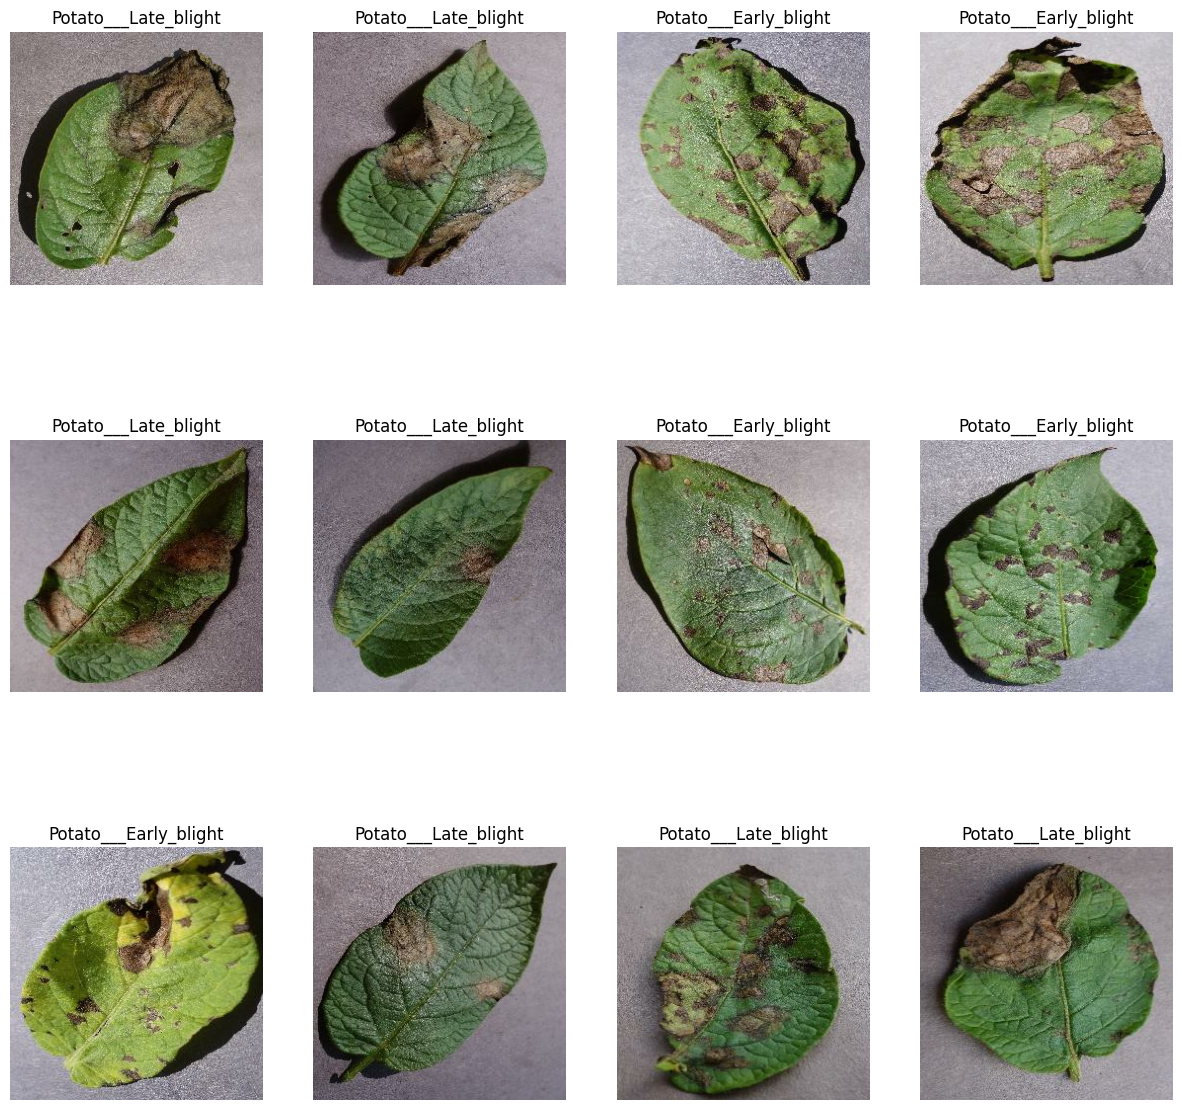

In [27]:
# Plotting the image
plt.figure(figsize = (15,15))
# dataset.take(count) : Creates a Dataset with at most 'count' elements(batch) from the dataset
for image, label in dataset.take(1):
    for i in range(12):
        plt.subplot(3, 4, i+1) # many plots at a time =>subpots
        plt.imshow(image[i].numpy().astype('uint8')) #converting all data of image into numpy and than to intiger type as they were in float.
        plt.title(class_name[label[i]])  # title of the class_name of image
        plt.axis("off") # Hide the values of graph


In [28]:
# Function for Splitting the data
def split_dataset(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed = 10)

    ds_size = len(ds)
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [29]:
train_data, val_data, test_data = split_dataset(dataset)

In [30]:
print("Size of Data is :{0} \nBatch size of Training Data is :{1}\nBatch size of Validation Data is :{2} \nBatch size of Testing Data is :{3} " .format(len(dataset), len(train_data), len(val_data), len(test_data)))

Size of Data is :68 
Batch size of Training Data is :54
Batch size of Validation Data is :6 
Batch size of Testing Data is :8 


In [31]:
# caching,shuffle and prefetching the data
train_ds = train_data.cache().shuffle(100).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_data.cache().shuffle(100).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_data.cache().shuffle(100).prefetch(buffer_size = tf.data.AUTOTUNE)

In [32]:
# Image Preprocessing : Rescaling and Resizing
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(Image_Size, Image_Size),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [33]:
# Data augmentation by flipping and rotating existing images
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(factor = 0.5)
])

In [34]:
# Creating Convolution layer
input_shape = (Batch_Size, Image_Size, Image_Size, Channels)
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(filters = 16, kernel_size = (3,3), activation = 'relu', input_shape = input_shape),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(128, (3,3), activation = 'relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(128, (3,3), activation = 'relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPool2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(64, activation = 'softmax'),

])


model.build(input_shape = input_shape)

In [35]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        9280      
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [36]:
# Optimizing the model 'SparseCategoricalCrossentropy'=>as there are many categorical classes of data
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ['accuracy'])

In [37]:
#Fit the model with training data and also pass validation data
history = model.fit(
train_data, epochs = Epochs, batch_size = Batch_Size, verbose = 1, validation_data = val_data)

Epoch 1/40
54/54 [==============================] - 156s 3s/step - loss: 1.1674 - accuracy: 0.4891 - val_loss: 0.7934 - val_accuracy: 0.6354
Epoch 2/40
54/54 [==============================] - 143s 3s/step - loss: 0.6444 - accuracy: 0.6970 - val_loss: 0.5094 - val_accuracy: 0.7240
Epoch 3/40
54/54 [==============================] - 146s 3s/step - loss: 0.3664 - accuracy: 0.8420 - val_loss: 0.2796 - val_accuracy: 0.8646
Epoch 4/40
54/54 [==============================] - 144s 3s/step - loss: 0.2332 - accuracy: 0.9025 - val_loss: 0.1788 - val_accuracy: 0.9323
Epoch 5/40
54/54 [==============================] - 147s 3s/step - loss: 0.2017 - accuracy: 0.9207 - val_loss: 0.2931 - val_accuracy: 0.8802
Epoch 6/40
54/54 [==============================] - 144s 3s/step - loss: 0.2661 - accuracy: 0.8902 - val_loss: 0.1396 - val_accuracy: 0.9401
Epoch 7/40
54/54 [==============================] - 142s 3s/step - loss: 0.1879 - accuracy: 0.9266 - val_loss: 0.2372 - val_accuracy: 0.9271
Epoch 8/40
54

In [38]:
scores = model.evaluate(train_data)

54/54 [==============================] - 45s 802ms/step - loss: 0.0194 - accuracy: 0.9935


In [39]:
history.params

{'verbose': 1, 'epochs': 40, 'steps': 54}

In [40]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [41]:
# Getting the model history to analyse
train_loss = history.history['loss']
train_acc = history.history['accuracy']

val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

Text(0.5, 1.0, 'Training and Validation Loss')

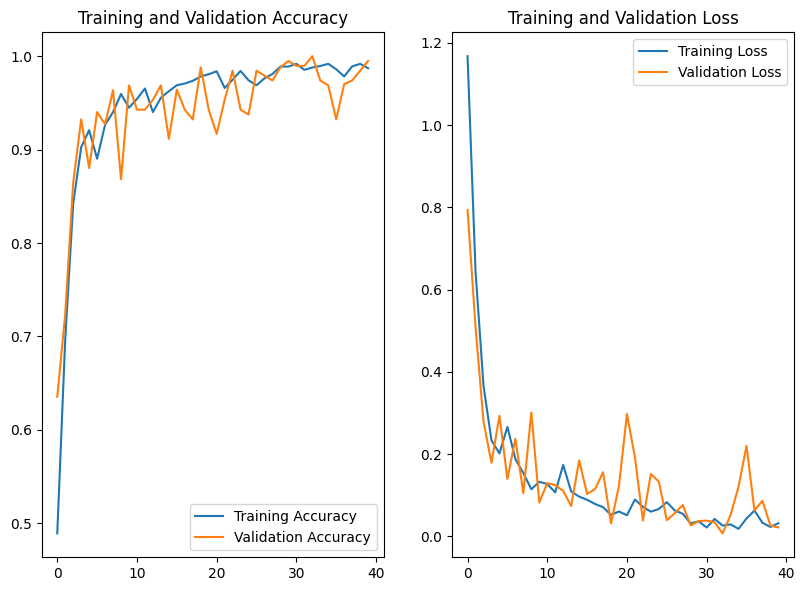

In [42]:
#graphs for accuracy and loss of training and validation data
plt.figure(figsize = (15,15))
plt.subplot(2,3,1)
plt.plot(range(Epochs), train_acc, label = 'Training Accuracy')
plt.plot(range(Epochs), val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2,3,2)
plt.plot(range(Epochs), train_loss, label = 'Training Loss')
plt.plot(range(Epochs), val_loss, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Loss')

First Image of batch to predict :
Actual label :  Potato___Late_blight
1/1 [==============================] - 1s 791ms/step
Predicted label :  Potato___Late_blight


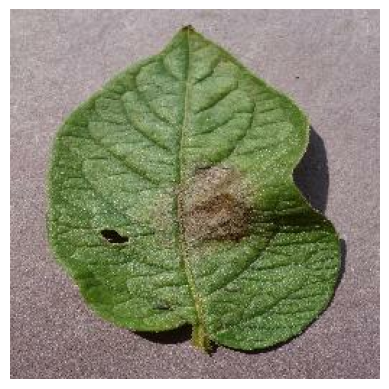

In [43]:
#plotting image
for batch_image, batch_label in train_data.take(1):
    first_image = batch_image[0].numpy().astype('uint8')
    first_label = class_name[batch_label[0]]

    print('First Image of batch to predict :')
    plt.imshow(first_image)
    print('Actual label : ', first_label)

    batch_prediction = model.predict(batch_image)
    print('Predicted label : ', class_name[np.argmax(batch_prediction[0])])
    plt.axis('off')

1/1 [==============================] - 1s 1s/step


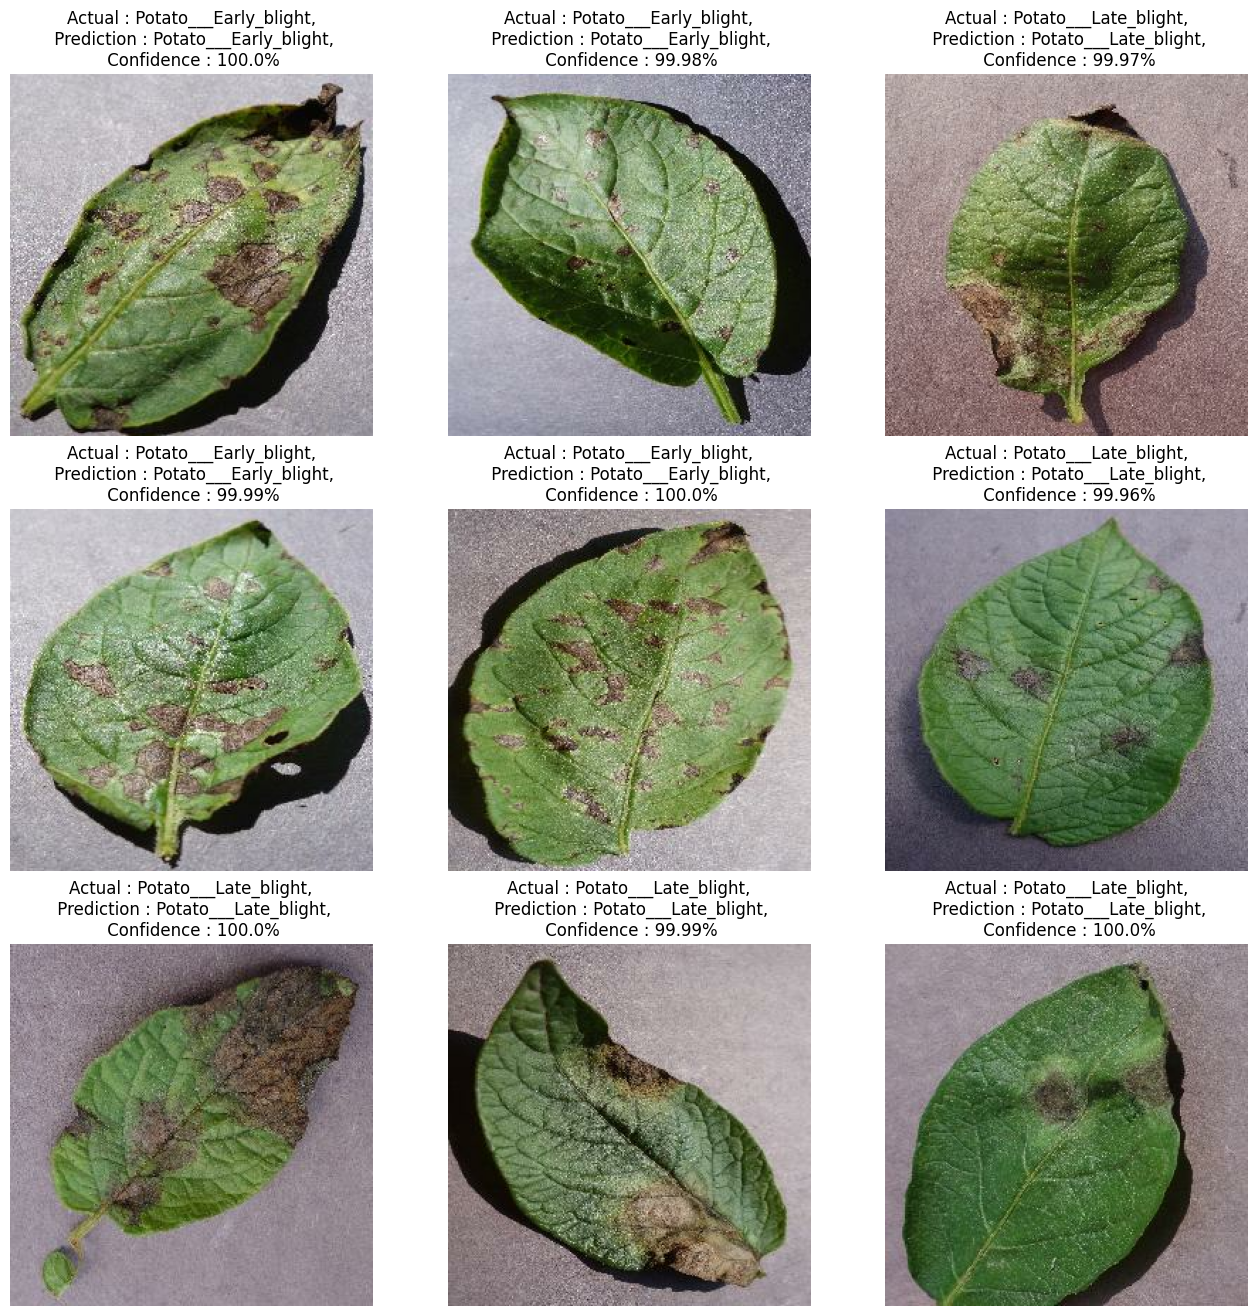

In [53]:
# plotting batch of images with its actual label, predicted label and confidence
plt.figure(figsize = (16,16))
for batch_image, batch_label in train_data.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        image = batch_image[i].numpy().astype('uint8')
        label = class_name[batch_label[i]]

        plt.imshow(image)

        batch_prediction = model.predict(batch_image)
        predicted_class = class_name[np.argmax(batch_prediction[i])]
        confidence = round(np.max(batch_prediction[i]) * 100, 2)

        plt.title(f'Actual : {label},\n Prediction : {predicted_class},\n Confidence : {confidence}%')

        plt.axis('off')

In [49]:
model.save("emon.h5")

In [55]:
from tensorflow.keras.models import load_model
# Provide the path to your saved model file
model_path = '/content/emon.h5'

# Load the saved model
model = load_model(model_path)

In [60]:
from tensorflow.keras.models import load_model

# Provide the path to your saved model file
model_path = '/content/emon.h5'

# Load the saved model
model = load_model(model_path)

# Get the number of classes
num_classes = model.layers[-1].output_shape[-1]

print('Number of Classes:', num_classes)


Number of Classes: 64


In [63]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Provide the path to your saved model file
model_path = '/content/emon.h5'

# Load the saved model
model = load_model(model_path)

# Define the test dataset directory
test_data_dir = '/content/potato'

# Set the input image size based on your model's input requirements
input_size = (256, 256)

# Create an ImageDataGenerator for test data
test_data_generator = ImageDataGenerator(rescale=1.0 / 255)

# Load the test dataset using the ImageDataGenerator
test_data = test_data_generator.flow_from_directory(
    test_data_dir,
    target_size=input_size,
    batch_size=1,
    class_mode='categorical',
    shuffle=False
)

# Get the class labels
class_labels = list(test_data.class_indices.keys())

# Print the class labels
for i, label in enumerate(class_labels):
    print(f'Class {i}: {label}')


Found 2151 images belonging to 3 classes.
Class 0: Potato___Early_blight
Class 1: Potato___Late_blight
Class 2: Potato___healthy
